<a href="https://colab.research.google.com/github/manoliapinar/FastAPI-Project/blob/main/03_Exploratory_Analysis_Airport_Weather_Flight_Cancellations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

geolocation_clean_path = '/content/drive/My Drive/project-data-analysis/dataset/clean_airports_geolocation.csv'
cancelled_diverted_clean_path = '/content/drive/My Drive/project-data-analysis/dataset/clean_cancelled_diverted_2023.csv'
weather_meteo_clean_path = '/content/drive/My Drive/project-data-analysis/dataset/clean_weather_meteo_by_airport.csv'

try:
    airports_geolocation_clean = pd.read_csv(geolocation_clean_path)
    print("Données de géolocalisation des aéroports chargées avec succès.")
except Exception as e:
    print(f"Erreur lors du chargement de clean_airports_geolocation.csv : {e}")

try:
    cancelled_diverted_clean = pd.read_csv(cancelled_diverted_clean_path)
    print("Données de vols annulés et détournés chargées avec succès.")
except Exception as e:
    print(f"Erreur lors du chargement de clean_cancelled_diverted_2023.csv : {e}")

try:
    weather_meteo_clean = pd.read_csv(weather_meteo_clean_path)
    print("Données météorologiques chargées avec succès.")
except Exception as e:
    print(f"Erreur lors du chargement de clean_weather_meteo_by_airport.csv : {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Données de géolocalisation des aéroports chargées avec succès.
Données de vols annulés et détournés chargées avec succès.
Données météorologiques chargées avec succès.


In [ ]:
print("Statistiques descriptives - Géolocalisation des aéroports :")
print(airports_geolocation_clean.describe())

Statistiques descriptives - Géolocalisation des aéroports :
         latitude   longitude
count  364.000000  364.000000
mean    38.810970  -96.809033
std      8.757505   27.471654
min    -14.278100 -176.646030
25%     33.672655 -110.788562
50%     39.251930  -93.743140
75%     43.113110  -82.501792
max     71.285450  145.733300


In [ ]:
print("\nStatistiques descriptives - Vols annulés et détournés :")
print(cancelled_diverted_clean.describe())


Statistiques descriptives - Vols annulés et détournés :
         day_of_week      cancelled       diverted      dep_delay  \
count  103543.000000  103543.000000  103543.000000  103543.000000   
mean        3.969993       0.840144       0.159856       7.870025   
std         2.021613       0.366474       0.366474      49.841918   
min         1.000000       0.000000       0.000000     -31.000000   
25%         2.000000       1.000000       0.000000       0.000000   
50%         4.000000       1.000000       0.000000       0.000000   
75%         6.000000       1.000000       0.000000       0.000000   
max         7.000000       1.000000       1.000000    2414.000000   

       dep_delay_tag  arr_delay  flight_duration  delay_carrier  \
count  103543.000000   103543.0         103543.0       103543.0   
mean        0.094598        0.0              0.0            0.0   
std         0.292661        0.0              0.0            0.0   
min         0.000000        0.0              0.0     

In [ ]:
print("\nStatistiques descriptives - Données météorologiques par aéroport :")
print(weather_meteo_clean.describe())


Statistiques descriptives - Données météorologiques par aéroport :
                tavg           tmin           tmax           prcp  \
count  132860.000000  132860.000000  132860.000000  132860.000000   
mean       14.042641       8.699833      19.617149       2.520604   
std        10.672859      10.680441      11.392223       7.915755   
min       -39.100000     -76.000000     -35.000000       0.000000   
25%         6.300000       1.100000      11.700000       0.000000   
50%        15.400000       9.400000      21.200000       0.000000   
75%        22.500000      17.200000      28.900000       1.000000   
max        42.200000      37.200000      50.000000     571.500000   

                snow           wdir           wspd           pres  
count  132860.000000  132860.000000  132860.000000  132860.000000  
mean        6.810131     188.686042      12.424556    1015.650368  
std        50.935283     114.629099       6.211261       6.944599  
min         0.000000       0.000000   

In [ ]:
print(weather_meteo_clean.columns)


Index(['time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres',
       'airport_id'],
      dtype='object')


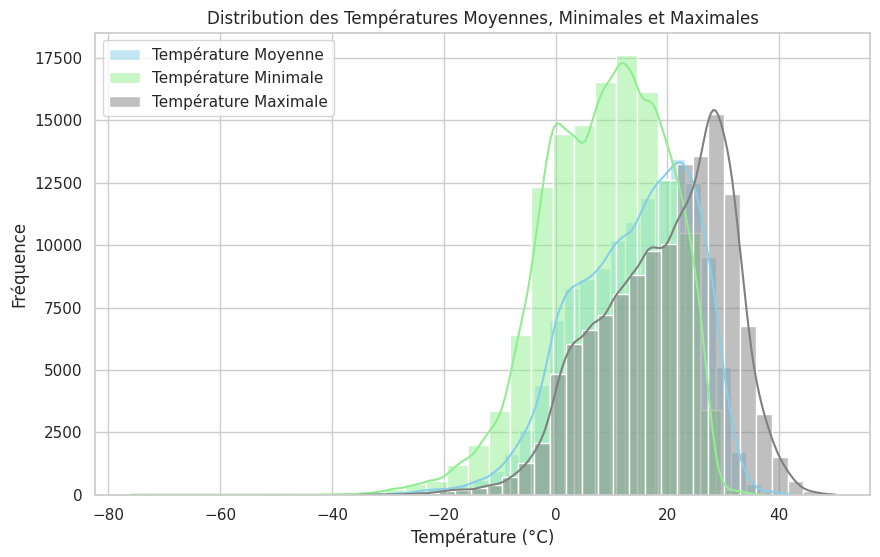

In [41]:
plt.figure(figsize=(10,6))

sns.histplot(weather_meteo_clean['tavg'], bins=30, kde=True, color='skyblue', label='Température Moyenne')
sns.histplot(weather_meteo_clean['tmin'], bins=30, kde=True, color='lightgreen', label='Température Minimale')
sns.histplot(weather_meteo_clean['tmax'], bins=30, kde=True, color='grey', label='Température Maximale')

plt.title('Distribution des Températures Moyennes, Minimales et Maximales')
plt.xlabel('Température (°C)')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

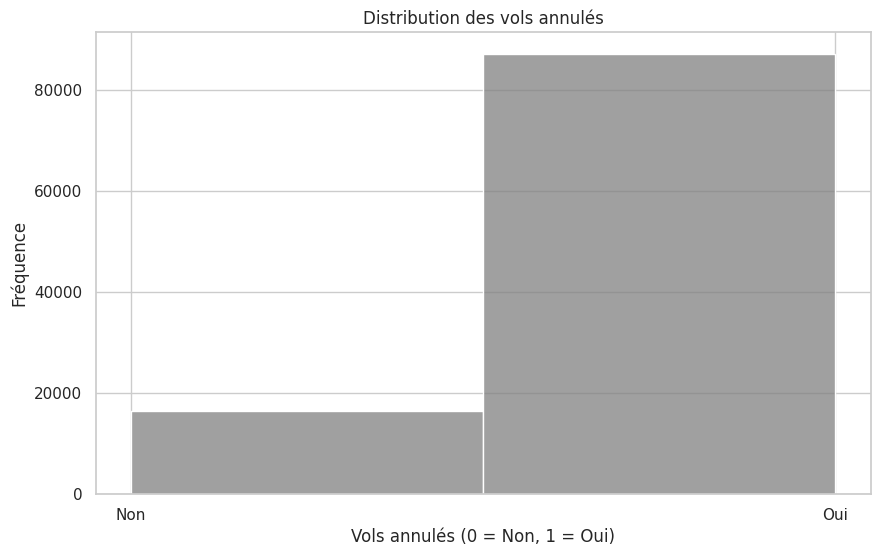

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(cancelled_diverted_clean['cancelled'], bins=2, kde=False, color='grey')

plt.title('Distribution des vols annulés')
plt.xlabel('Vols annulés (0 = Non, 1 = Oui)')
plt.ylabel('Fréquence')
plt.xticks(ticks=[0, 1], labels=['Non', 'Oui'])
plt.show()

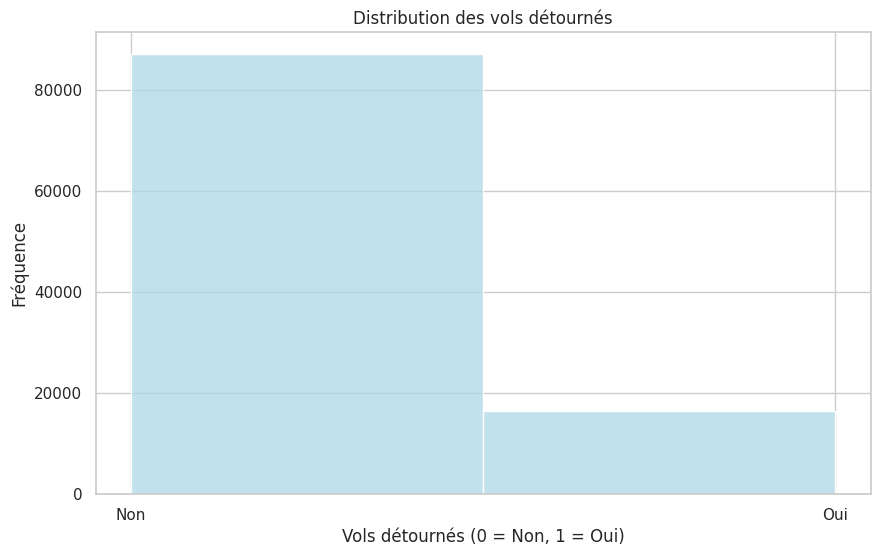

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(cancelled_diverted_clean['diverted'], bins=2, kde=False, color='lightblue')

plt.title('Distribution des vols détournés')
plt.xlabel('Vols détournés (0 = Non, 1 = Oui)')
plt.ylabel('Fréquence')
plt.xticks(ticks=[0, 1], labels=['Non', 'Oui'])
plt.show()

In [33]:
import pandas as pd
airports_geolocation = pd.read_csv('/content/drive/My Drive/project-data-analysis/dataset/airports_geolocation.csv')

In [36]:
print(airports_geolocation.head())

  IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447  


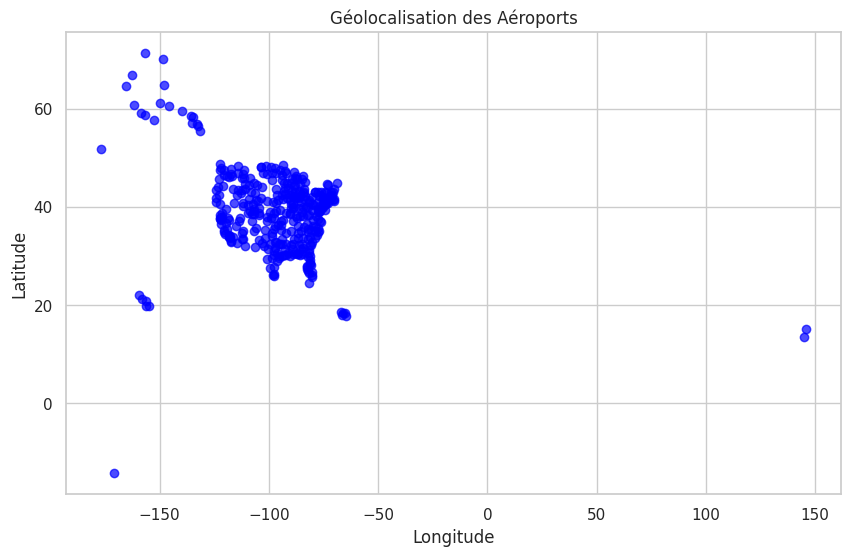

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(airports_geolocation['LONGITUDE'], airports_geolocation['LATITUDE'], alpha=0.7, color='blue')
plt.title('Géolocalisation des Aéroports')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()